In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt

In [4]:
#No se como poner la ubicacion desde el repositorio asi que la que esta aqui es la de mi pc
data = pd.read_excel("C:/Users/HP 15/Downloads/Samsung/Repositorio/sic-forest-fire-rd/data/Incendios-Forestales-2021.xlsx")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   no.                      250 non-null    int64  
 1   Municipio                250 non-null    object 
 2   Provincia                250 non-null    object 
 3   Mes de origen            250 non-null    object 
 4   Dia de origen            250 non-null    int64  
 5   Mes de extincion         250 non-null    object 
 6   Dia extincion            250 non-null    int64  
 7   Causas                   250 non-null    object 
 8   Area Afectada en Tareas  250 non-null    int64  
 9   Metros Cuadrados         250 non-null    float64
 10  Mes de origen .1         250 non-null    int64  
 11  Fecha origen             250 non-null    object 
 12  Fecha Extincion          250 non-null    object 
 13  Fecha Mes                250 non-null    object 
dtypes: float64(1), int64(5), o

In [5]:
def fr_mes(fire):
    #Crea otro DataFrame solo con las columnas deseadas
    delete = ["Municipio", "Provincia", "Mes de extincion", "Area Afectada en Tareas", "Metros Cuadrados", "Dia de origen", "Dia extincion", "Fecha origen", "Fecha Extincion", "Fecha Mes"]
    f_clean = fire.drop(delete, axis= 1)
    print(f_clean.head())

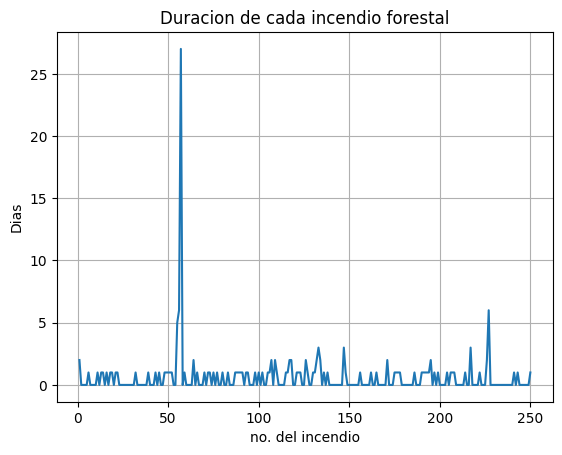

   no. Mes de origen  Mes de extincion  Mes de origen .1 Fecha origen  \
0    1          Enero            Enero                 1   2021-01-05   
1    2          Enero            Enero                 1   2021-01-13   
2    3          Enero            Enero                 1   2021-01-03   
3    4          Enero            Enero                 1   2021-01-16   
4    5          Enero            Enero                 1   2021-01-15   

  Fecha Extincion   Fecha Mes  Duracion en Dias  
0      2021-01-07    may-2021                 2  
1      2021-01-13  01/13/2021                 0  
2      2021-01-03    mar-2021                 0  
3      2021-01-16  01/16/2021                 0  
4      2021-01-15  01/15/2021                 0  


In [8]:
def d_prom(fire): #extrae la duracion promedio de los incendios en el dataframe
    #Crea otro DataFrame solo con las columnas deseadas
    delete = ["Municipio", "Provincia", "Causas", "Area Afectada en Tareas", "Metros Cuadrados", "Dia de origen", "Dia extincion"]
    f_clean = fire.drop(delete, axis= 1).sort_values(by='no.')

    #Convierte el continido de las columnas a utilizar en tipo DateTime
    f_clean["Fecha origen"] = pd.to_datetime(f_clean["Fecha origen"], format='%m/%d/%Y')
    f_clean["Fecha Extincion"] = pd.to_datetime(f_clean["Fecha Extincion"], format='%m/%d/%Y')

    #Se descubrio que algunas informaciones sobre meses estaban erroneas, por lo que a continuacion se corrigen
    f_clean.loc[f_clean['Fecha Extincion'] < f_clean['Fecha origen'], 'Fecha Extincion'] = f_clean.loc[f_clean['Fecha Extincion'] < f_clean['Fecha origen'], 'Fecha Extincion'].apply(sum_m)

    #Crea otra columna con la diferencia en dias entre la fecha de inicio de los incendios y la fecha de extincion
    f_clean["Duracion en Dias"] = (f_clean["Fecha Extincion"] - f_clean["Fecha origen"]).dt.days

    #Grafica la informacion obtenida
    plt.plot(f_clean["no."], f_clean["Duracion en Dias"])
    plt.title("Duracion de cada incendio forestal")
    plt.xlabel("no. del incendio")
    plt.ylabel("Dias")
    plt.grid()
    plt.show()
    print(f_clean.head())


def sum_m(fecha):
  fecha = dt.strftime(fecha, "%m-%d-%Y")
  m, d, y = fecha.split("-")
  m = int(m) + 1
  return dt.strptime(f"{m}-{d}-{y}", "%m-%d-%Y")

d_prom(data)